In [1]:

#1: Load the Titanic Train and Test Datasets
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, GridSearchCV

In [2]:
file_path1=r'C:\Users\ujjwa\Downloads\Titanic_train.csv'

In [3]:
file_path2=r'C:\Users\ujjwa\Downloads\Titanic_test.csv'

In [4]:
# Load the Titanic train and test datasets
train_df = pd.read_csv(file_path1)  # Ensure correct path
test_df = pd.read_csv(file_path2)  # Ensure correct path


In [5]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
# Display the first few rows of the train and test datasets
print("Train dataset:")
print(train_df.head())
print("\nTest dataset:")
print(test_df.head())

Train dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   Na

In [8]:
#2: Check for Missing Values in Both Datasets
# Check for missing values in the training and test datasets
train_missing = train_df.isnull().sum()
test_missing = test_df.isnull().sum()

print("Missing values in Train dataset:")
print(train_missing)
print("\nMissing values in Test dataset:")
print(test_missing)

Missing values in Train dataset:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values in Test dataset:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [9]:
#Step 2: Exploratory Data Analysis (EDA)
# Check for missing values in both train and test datasets
train_missing = train_df.isnull().sum()
test_missing = test_df.isnull().sum()

In [10]:
train_missing 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
test_missing 

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

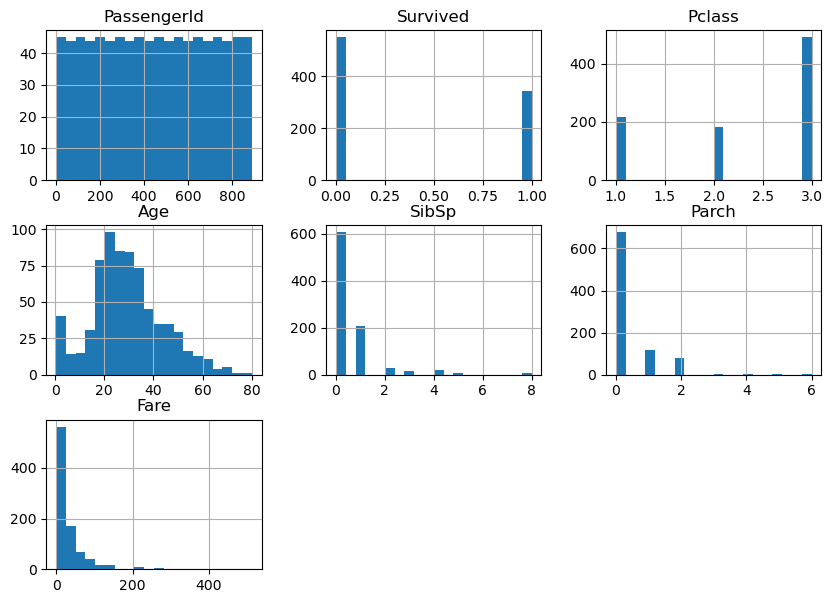

In [12]:
# Explore data distributions for train_df
train_df.hist(bins=20, figsize=(10, 7))
plt.title('Train Data - Feature Distributions')
plt.show()

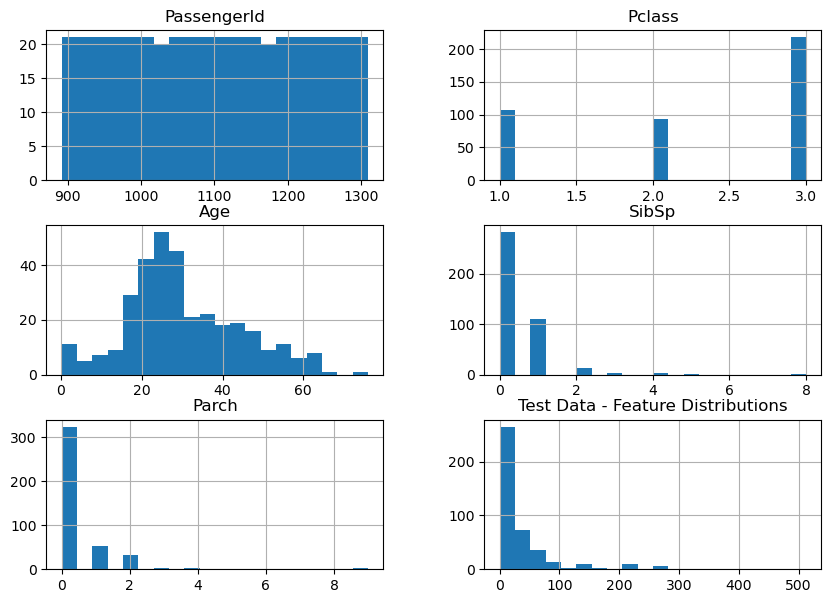

In [13]:
# Explore data distributions for test_df
test_df.hist(bins=20, figsize=(10, 7))
plt.title('Test Data - Feature Distributions')
plt.show()

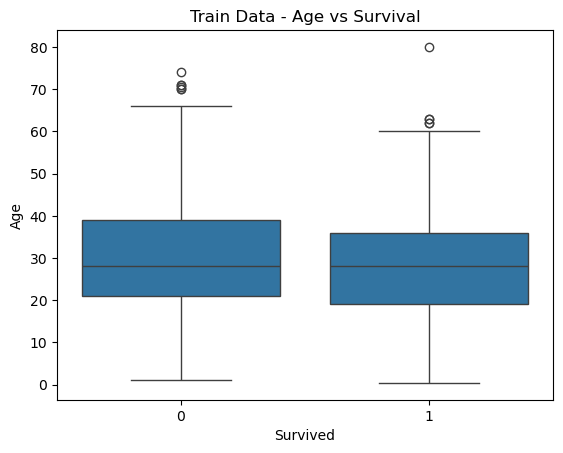

In [14]:
# Box plot for 'Age' in train_df
sns.boxplot(x='Survived', y='Age', data=train_df)
plt.title('Train Data - Age vs Survival')
plt.show()


The 'Survived' column is missing in test_df. Cannot plot Age vs Survival.


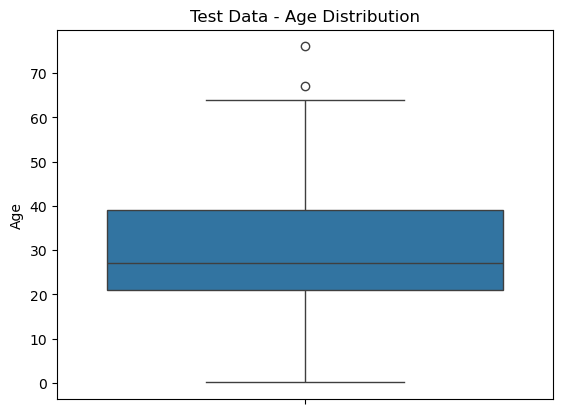

In [15]:
# Check if 'Survived' is in test_df
if 'Survived' in test_df.columns:
    sns.boxplot(x='Survived', y='Age', data=test_df)
    plt.title('Test Data - Age vs Survival')
    plt.show()
else:
    print("The 'Survived' column is missing in test_df. Cannot plot Age vs Survival.")
# Plot Age distribution in test_df
sns.boxplot(y='Age', data=test_df)
plt.title('Test Data - Age Distribution')
plt.show()

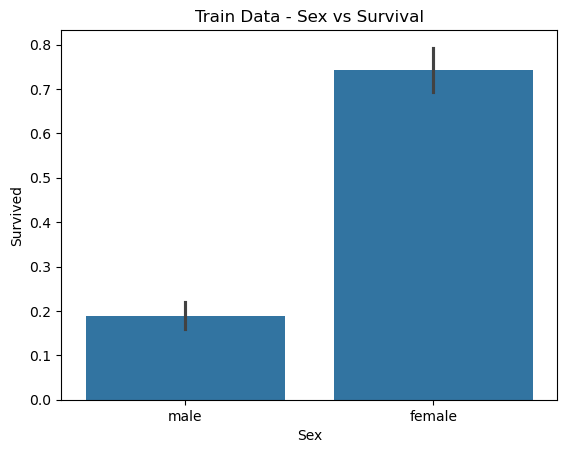

In [16]:
# Bar plot for 'Sex' vs 'Survived' in train_df
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.title('Train Data - Sex vs Survival')
plt.show()

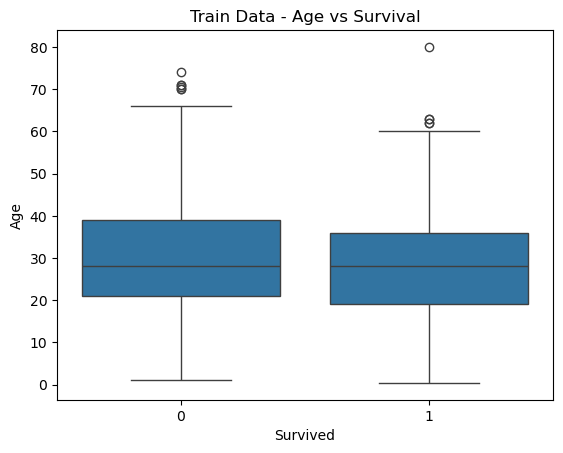

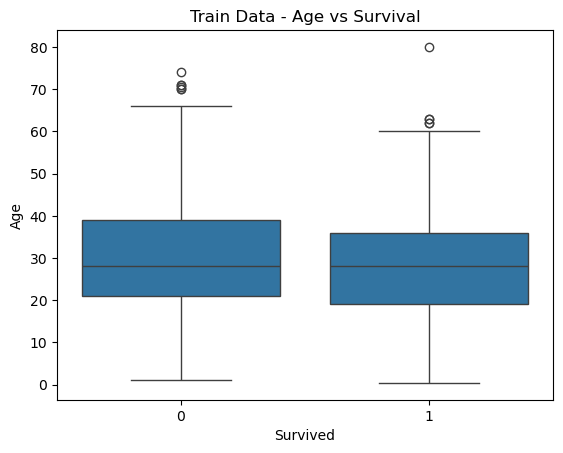

In [17]:
# Ensure that the 'Survived' column is in train_df
if 'Survived' in train_df.columns:
    sns.boxplot(x='Survived', y='Age', data=train_df)
    plt.title('Train Data - Age vs Survival')
    plt.show()
else:
    print("The 'Survived' column is missing in train_df. Cannot plot Age vs Survival.")
# Box plot for 'Age' vs 'Survived' in train_df
sns.boxplot(x='Survived', y='Age', data=train_df)
plt.title('Train Data - Age vs Survival')
plt.show()

In [18]:
#3. Data Preprocessing
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])


In [19]:
train_df['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [20]:
train_df['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [21]:
# Impute missing values for test_df
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].mean())
test_df['Embarked'] = test_df['Embarked'].fillna(test_df['Embarked'].mode()[0])


In [22]:
test_df['Age']

0      34.50000
1      47.00000
2      62.00000
3      27.00000
4      22.00000
         ...   
413    30.27259
414    39.00000
415    38.50000
416    30.27259
417    30.27259
Name: Age, Length: 418, dtype: float64

In [23]:
test_df['Embarked']

0      Q
1      S
2      Q
3      S
4      S
      ..
413    S
414    C
415    S
416    S
417    C
Name: Embarked, Length: 418, dtype: object

In [24]:
# One-hot encode categorical variables for train_df
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], drop_first=True)

In [25]:
train_df 

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,NaN,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,C85,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,NaN,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,NaN,True,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,B42,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,NaN,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,C148,True,False,False


In [26]:
# One-hot encode categorical variables for test_df
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked'], drop_first=True)



In [27]:
test_df

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",34.50000,0,0,330911,7.8292,NaN,True,True,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.00000,1,0,363272,7.0000,NaN,False,False,True
2,894,2,"Myles, Mr. Thomas Francis",62.00000,0,0,240276,9.6875,NaN,True,True,False
3,895,3,"Wirz, Mr. Albert",27.00000,0,0,315154,8.6625,NaN,True,False,True
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.00000,1,1,3101298,12.2875,NaN,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",30.27259,0,0,A.5. 3236,8.0500,NaN,True,False,True
414,1306,1,"Oliva y Ocana, Dona. Fermina",39.00000,0,0,PC 17758,108.9000,C105,False,False,False
415,1307,3,"Saether, Mr. Simon Sivertsen",38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,True,False,True
416,1308,3,"Ware, Mr. Frederick",30.27259,0,0,359309,8.0500,NaN,True,False,True


In [28]:
# Feature scaling for numerical features (Age, Fare) for both datasets
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_df[['Age', 'Fare']] = scaler.fit_transform(train_df[['Age', 'Fare']])
test_df[['Age', 'Fare']] = scaler.transform(test_df[['Age', 'Fare']])


In [29]:
train_df[['Age', 'Fare']]

,Age,Fare
0,-0.592481,-0.502445
1,0.638789,0.786845
2,-0.284663,-0.488854
3,0.407926,0.420730
4,0.407926,-0.486337
...,...,...
886,-0.207709,-0.386671
887,-0.823344,-0.044381
888,0.000000,-0.176263
889,-0.284663,-0.044381


In [30]:
test_df[['Age', 'Fare']]

,Age,Fare
0,0.369449,-0.490783
1,1.331378,-0.507479
2,2.485693,-0.453367
3,-0.207709,-0.474005
4,-0.592481,-0.401017
...,...,...
413,0.044131,-0.486337
414,0.715743,1.544246
415,0.677266,-0.502445
416,0.044131,-0.486337


In [31]:
#4. Building Predictive Models
# Define the target and features for train_df
X_train = train_df.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin'])
y_train = train_df['Survived']


In [32]:
X_train 

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,3,-0.592481,1,0,-0.502445,True,False,True
1,2,1,0.638789,1,0,0.786845,False,False,False
2,3,3,-0.284663,0,0,-0.488854,False,False,True
3,4,1,0.407926,1,0,0.420730,False,False,True
4,5,3,0.407926,0,0,-0.486337,True,False,True
...,...,...,...,...,...,...,...,...,...
886,887,2,-0.207709,0,0,-0.386671,True,False,True
887,888,1,-0.823344,0,0,-0.044381,False,False,True
888,889,3,0.000000,1,2,-0.176263,False,False,True
889,890,1,-0.284663,0,0,-0.044381,True,False,False


In [33]:
y_train 

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [34]:
# Split train_df into training and testing sets (e.g., 80% training, 20% testing)
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [35]:
X_train_split, X_test_split, y_train_split, y_test_split

(     PassengerId  Pclass       Age  SibSp  Parch      Fare  Sex_male  \
 331          332       1  1.215947      0      0 -0.074583      True   
 733          734       2 -0.515526      0      0 -0.386671      True   
 382          383       3  0.177063      0      0 -0.488854      True   
 704          705       3 -0.284663      1      0 -0.490280      True   
 813          814       3 -1.823750      4      2 -0.018709     False   
 ..           ...     ...       ...    ...    ...       ...       ...   
 106          107       3 -0.669435      0      0 -0.494391     False   
 270          271       1  0.000000      0      0 -0.024246      True   
 860          861       3  0.869652      2      0 -0.364355      True   
 435          436       1 -1.208115      1      2  1.767741     False   
 102          103       1 -0.669435      0      1  0.907738      True   
 
      Embarked_Q  Embarked_S  
 331       False        True  
 733       False        True  
 382       False        True 

In [36]:
# LightGBM Model for train_df
lgb_model_train = lgb.LGBMClassifier()


In [37]:
# Fit the model on the training data
lgb_model_train.fit(X_train_split, y_train_split)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000304 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 434
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier()

In [38]:
# Make predictions using the test data
lgb_pred_train = lgb_model_train.predict(X_test_split)

In [39]:
lgb_pred_train

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [40]:
# XGBoost Model for train_df
xgb_model_train = xgb.XGBClassifier()


In [41]:

# Fit the model on the training data
xgb_model_train.fit(X_train_split, y_train_split)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [42]:
# Make predictions on the test data
xgb_pred_train = xgb_model_train.predict(X_test_split)

In [43]:
xgb_pred_train 

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1])

In [44]:
# Evaluate Models for train_df
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

In [45]:

lgb_metrics_train = evaluate_model(y_test_split, lgb_pred_train)
xgb_metrics_train = evaluate_model(y_test_split, xgb_pred_train)


In [46]:
lgb_metrics_train

(0.8212290502793296,
 0.7837837837837838,
 0.7837837837837838,
 0.7837837837837838)

In [47]:
xgb_metrics_train 

(0.7932960893854749,
 0.7605633802816901,
 0.7297297297297297,
 0.7448275862068966)

In [50]:
#Test Data: LightGBM and XGBoost Models
# Define the target and features for test_df
print(test_df.columns)


Index(['PassengerId', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Sex_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [52]:
# Make sure 'Survived' exists in test_df before trying to drop it
# Drop unnecessary columns and prepare features for prediction
X_test = test_df.drop(columns=['Name', 'Ticket', 'Cabin'])  # Drop only feature columns



In [53]:
X_test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,892,3,0.369449,0,0,-0.490783,True,True,False
1,893,3,1.331378,1,0,-0.507479,False,False,True
2,894,2,2.485693,0,0,-0.453367,True,True,False
3,895,3,-0.207709,0,0,-0.474005,True,False,True
4,896,3,-0.592481,1,1,-0.401017,False,False,True
...,...,...,...,...,...,...,...,...,...
413,1305,3,0.044131,0,0,-0.486337,True,False,True
414,1306,1,0.715743,0,0,1.544246,False,False,False
415,1307,3,0.677266,0,0,-0.502445,True,False,True
416,1308,3,0.044131,0,0,-0.486337,True,False,True


In [64]:
# LightGBM Model for test_df
lgb_model_test = lgb.LGBMClassifier()
lgb_model_test.fit(X_train_split, y_train_split)  # Train on train_df's training set
lgb_pred_test = lgb_model_test.predict(X_test)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000143 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 434
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [65]:
# XGBoost Model for test_df
xgb_model_test = xgb.XGBClassifier()
xgb_model_test.fit(X_train_split, y_train_split)  # Train on train_df's training set
xgb_pred_test = xgb_model_test.predict(X_test)


In [66]:
xgb_pred_test

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [68]:
# Assuming you have your training data prepared as X_train and y_train
# Train LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

# Train XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000218 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 478
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [69]:
# Make predictions using the trained models
lgb_pred_test = lgb_model.predict(X_test)  # Replace lgb_model with your actual model variable
xgb_pred_test = xgb_model.predict(X_test)  # Replace xgb_model with your actual model variable


In [70]:
lgb_pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [71]:
xgb_pred_test

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [75]:
# Now you can evaluate the models if you have y_test
if 'y_test' in locals():  # Check if y_test is defined
    lgb_metrics_test = evaluate_model(y_test, lgb_pred_test)
    xgb_metrics_test = evaluate_model(y_test, xgb_pred_test)

    # Print the evaluation metrics
    print("LightGBM Metrics on Test Set:")
    print(lgb_metrics_test)

    print("XGBoost Metrics on Test Set:")
    print(xgb_metrics_test)
else:
    print("y_test is not defined. Cannot evaluate models.")

y_test is not defined. Cannot evaluate models.


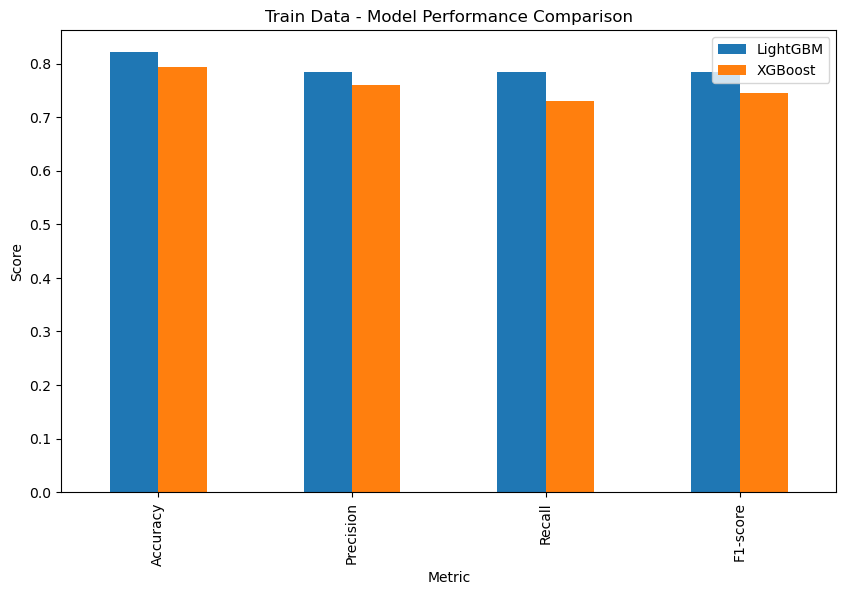

In [77]:
# Visualize comparison for Train Data
df_comparison_train.set_index('Metric').plot(kind='bar', figsize=(10, 6))
plt.title('Train Data - Model Performance Comparison')
plt.ylabel('Score')
plt.show()